<a href="https://colab.research.google.com/github/amdadev/amdadev/blob/main/tomato_incption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
import numpy as np
import tensorflow as tf
import cv2
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import applications
from tensorflow.keras import optimizers

In [ ]:
data_dir = r'/content/drive/MyDrive/tomato/train'


image_generator = ImageDataGenerator(validation_split=0.3)



train_data_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 5652 images belonging to 9 classes.
Found 2415 images belonging to 9 classes.


In [ ]:
base_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,821,225 (83.24 MB)

 Trainable params: 21,786,793 (83.11 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Inception_v3_TL_tomato.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=False,
    save_freq='epoch',
    verbose=1
)


In [ ]:
callbacks = [checkpoint]  # List of callbacks including the ModelCheckpoint
epochs = 20               # Number of epochs to train the model
batch_size = 32           # Batch size for training



In [ ]:
history = model.fit(
    train_data_dir,  # Training data generator
    steps_per_epoch=train_data_dir.samples // batch_size,
    validation_data=validation_dir,  # Validation data generator
    validation_steps=validation_dir.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

# Save the trained model
model.save('Inception_v3_TL_tomato.keras')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2077 - loss: 2.1700 
Epoch 1: saving model to Inception_v3_TL_tomato.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 3723s 20s/step - accuracy: 0.2082 - loss: 2.1690 - val_accuracy: 0.3650 - val_loss: 1.7733
Epoch 2/20
  1/176 ━━━━━━━━━━━━━━━━━━━━ 1:19 454ms/step - accuracy: 0.4688 - loss: 1.7712

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to Inception_v3_TL_tomato.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.4688 - loss: 1.7712 - val_accuracy: 0.2667 - val_loss: 1.8076
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.4838 - loss: 1.5752
Epoch 3: saving model to Inception_v3_TL_tomato.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 119s 562ms/step - accuracy: 0.4841 - loss: 1.5746 - val_accuracy: 0.6175 - val_loss: 1.3311
Epoch 4/20
  1/176 ━━━━━━━━━━━━━━━━━━━━ 1:09 397ms/step - accuracy: 0.6562 - loss: 1.1400
Epoch 4: saving model to Inception_v3_TL_tomato.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 1.1400 - val_accuracy: 0.6667 - val_loss: 1.1463
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.6506 - loss: 1.1521
Epoch 5: saving model to Inception_v3_TL_tomato.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 98s 551ms/step - accuracy: 0.6508 - loss: 1.1516 - val_accuracy: 0.7154 - val_loss: 1.0195
Epoch 6/20
  1/176 ━━━━━━━━━━━━━━━━━━━━ 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


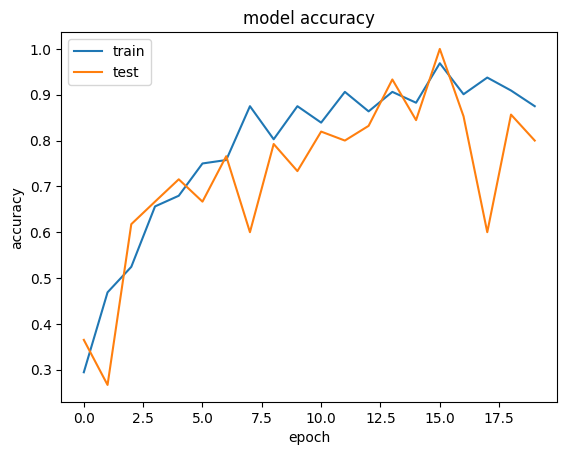

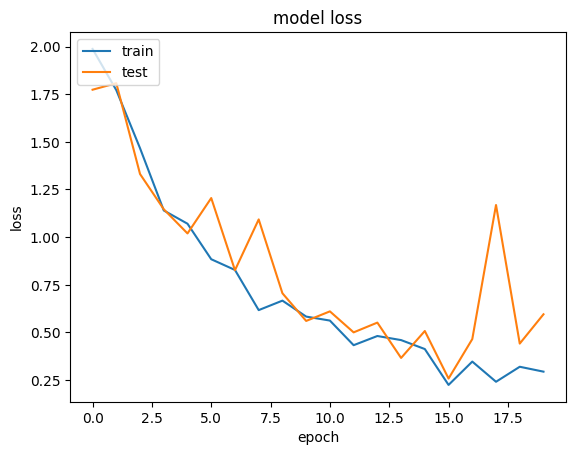

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

Found 2415 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step


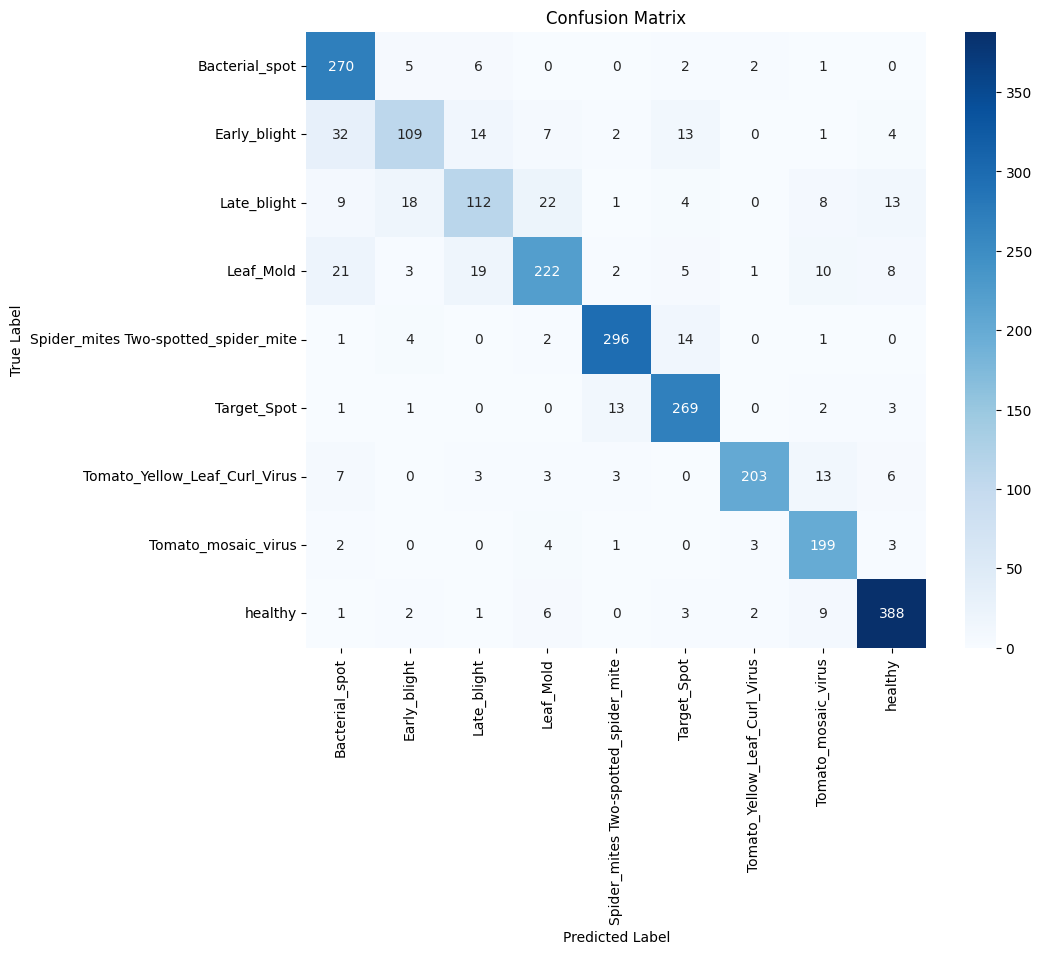

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Inception_v3_TL_tomato.keras')

# Get predictions for the validation set
validation_generator = image_generator.flow_from_directory(
    batch_size=32,
    directory=data_dir,
    shuffle=False,
    target_size=(299, 299),
    subset="validation",
    class_mode='categorical'
)

# Use predict instead of predict_generator
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with numbers
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Found 2415 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 34s 369ms/step


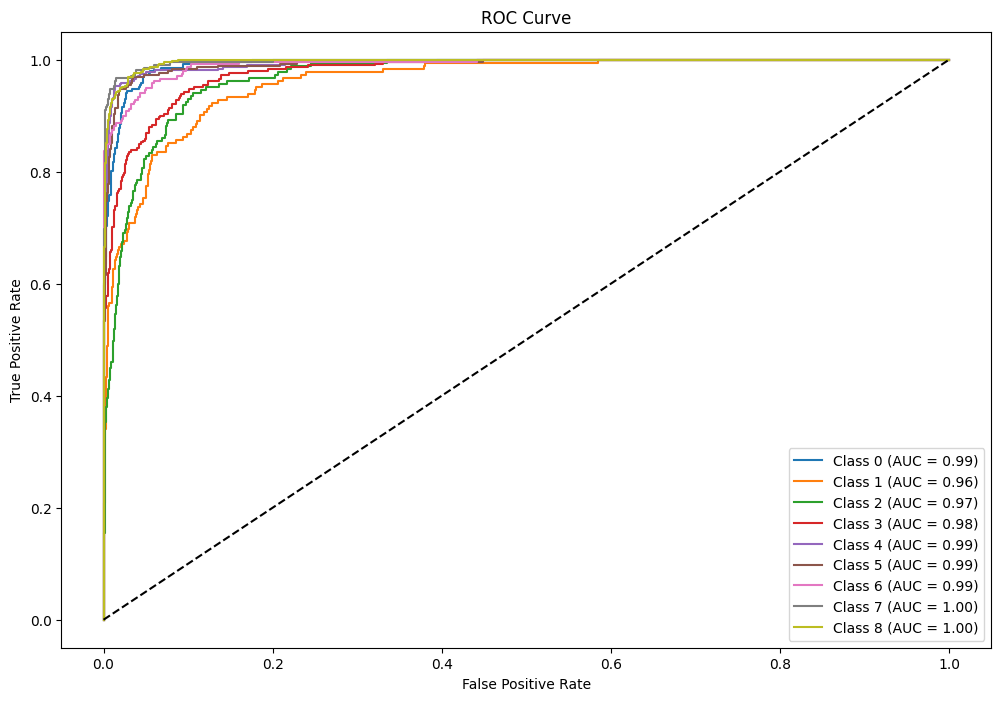

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Inception_v3_TL_tomato.keras')

# Get predictions for the validation set
validation_generator = image_generator.flow_from_directory(
    batch_size=32,
    directory=data_dir,
    shuffle=False,
    target_size=(299, 299),
    subset="validation",
    class_mode='categorical'
)

# Use predict instead of predict_generator
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_true = validation_generator.classes

# Calculate ROC curve and AUC for each class
num_classes = len(validation_generator.class_indices)
y_true_one_hot = label_binarize(y_true, classes=np.arange(num_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


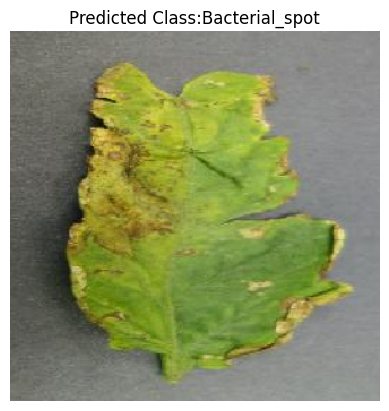

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Inception_v3_TL_tomato.keras')

# Specify the path to your single test image
single_image_path = '/content/drive/MyDrive/tomato/train/Bacterial_spot/090e981e-4e75-48db-806d-c28c970f3c9a___UF.GRC_BS_Lab Leaf 9256.JPG'

# Load and preprocess the single test image
img = image.load_img(single_image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Make predictions on the single test image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Define class labels (replace these with your actual class labels)
class_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold',
                'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot',
                'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']

# Display the image with the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


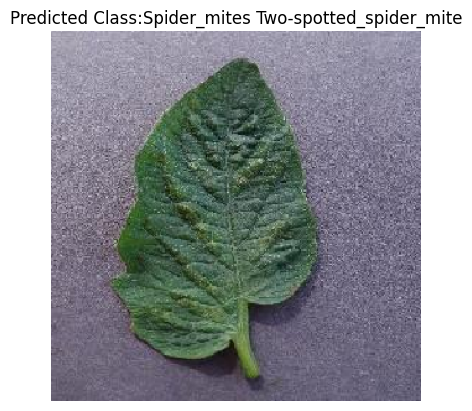

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Inception_v3_TL_tomato.keras')

# Specify the path to your single test image
single_image_path = '/content/drive/MyDrive/tomato/train/Spider_mites Two-spotted_spider_mite/01963a97-0507-43a6-ae4a-1afd8e0c4f3e___Com.G_SpM_FL 1217.JPG'

# Load and preprocess the single test image
img = image.load_img(single_image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Make predictions on the single test image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Define class labels (replace these with your actual class labels)
class_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold',
                'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot',
                'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']

# Display the image with the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


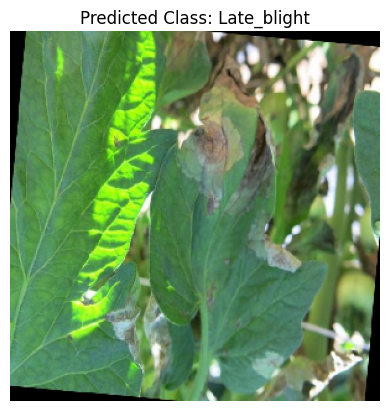

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Inception_v3_TL_tomato.keras')

# Specify the path to your single test image
single_image_path = '/content/drive/MyDrive/tomato/train/Late_blight/IMG_5808_jpg.rf.9de5af872dd2e7a58b115c4826fb18d4.jpg'

# Load and preprocess the single test image
img = image.load_img(single_image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Make predictions on the single test image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Define class labels (replace these with your actual class labels)
class_labels = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold',
                'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot',
                'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']

# Display the image with the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.show()

In [ ]:
import keras
import os
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd  # Import pandas
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from sklearn.model_selection import StratifiedKFold

# Define the path to your dataset
data_dir = r'/content/drive/MyDrive/tomato/train'

# Create an ImageDataGenerator without validation split
image_generator = ImageDataGenerator()

# Get the list of images and their corresponding labels
image_list = []
label_list = []
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image_list.append(image_path)
            label_list.append(class_name)

# Convert labels to numerical values
label_map = {label: i for i, label in enumerate(np.unique(label_list))}
numerical_labels = [label_map[label] for label in label_list]

# Define the number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
fold_no = 1
for train_index, val_index in skf.split(image_list, numerical_labels):
    print(f"Fold {fold_no}")

    # Create training and validation datasets for this fold
    train_images = [image_list[i] for i in train_index]
    train_labels = [numerical_labels[i] for i in train_index]
    val_images = [image_list[i] for i in val_index]
    val_labels = [numerical_labels[i] for i in val_index]

    # Convert numerical labels back to strings for DataFrame
    train_labels = [list(label_map.keys())[list(label_map.values()).index(label)] for label in train_labels]
    val_labels = [list(label_map.keys())[list(label_map.values()).index(label)] for label in val_labels]

    # Create training and validation data generators using flow_from_dataframe
    train_df = pd.DataFrame({'image_path': train_images, 'label': train_labels})
    val_df = pd.DataFrame({'image_path': val_images, 'label': val_labels})

    # Create ImageDataGenerators for training and validation
    train_data_generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='image_path',
        y_col='label',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    validation_data_generator = image_generator.flow_from_dataframe(
        dataframe=val_df,
        x_col='image_path',
        y_col='label',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Create and compile the model
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(len(label_map), activation='softmax')(x)  # Adjusted to the number of classes
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        train_data_generator,
        steps_per_epoch=train_data_generator.samples // 32,
        validation_data=validation_data_generator,
        validation_steps=validation_data_generator.samples // 32,
        epochs=20
    )

    # Optional: Evaluate the model and print metrics for analysis here
    # For example, you can store accuracy and loss for later analysis

    fold_no += 1

# After the loop, analyze the performance across all folds (e.g., calculate average accuracy)


Fold 1
Found 6373 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1594 validated image filenames belonging to 9 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 202s 759ms/step - accuracy: 0.2081 - loss: 2.1465 - val_accuracy: 0.5536 - val_loss: 1.4794
Epoch 2/20
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:26 437ms/step - accuracy: 0.4688 - loss: 1.6843

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.4688 - loss: 1.6843 - val_accuracy: 0.0385 - val_loss: 2.4082
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 96s 472ms/step - accuracy: 0.5224 - loss: 1.4951 - val_accuracy: 0.7219 - val_loss: 1.0259
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7812 - loss: 1.0367 - val_accuracy: 0.2308 - val_loss: 1.9292
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 98s 482ms/step - accuracy: 0.6638 - loss: 1.0860 - val_accuracy: 0.7940 - val_loss: 0.7671
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.7812 - loss: 0.7417 - val_accuracy: 0.2692 - val_loss: 1.6914
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 96s 477ms/step - accuracy: 0.7533 - loss: 0.8145 - val_accuracy: 0.8335 - val_loss: 0.6138
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.7500 - loss: 0.7958 - val_accuracy: 0.5385 - val_loss: 1.3370
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - accuracy: 0.8053 - loss: 0.6558 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1594 validated image filenames belonging to 9 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 185s 666ms/step - accuracy: 0.2256 - loss: 2.1415 - val_accuracy: 0.5083 - val_loss: 1.4932
Epoch 2/20
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:23 422ms/step - accuracy: 0.4375 - loss: 1.7239

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4375 - loss: 1.7239 - val_accuracy: 0.0000e+00 - val_loss: 2.4903
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 127s 472ms/step - accuracy: 0.5145 - loss: 1.5052 - val_accuracy: 0.7022 - val_loss: 1.0388
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 1.1059 - val_accuracy: 0.0000e+00 - val_loss: 2.1330
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 97s 478ms/step - accuracy: 0.6703 - loss: 1.0970 - val_accuracy: 0.7844 - val_loss: 0.7709
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.6562 - loss: 1.0321 - val_accuracy: 0.0769 - val_loss: 1.8875
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 96s 477ms/step - accuracy: 0.7613 - loss: 0.8287 - val_accuracy: 0.8176 - val_loss: 0.6099
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 0.7571 - val_accuracy: 0.2308 - val_loss: 1.6504
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 141s 477ms/step - accuracy: 0.8085 - loss: 0.6614 - va

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1594 validated image filenames belonging to 9 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 181s 657ms/step - accuracy: 0.2246 - loss: 2.1647 - val_accuracy: 0.5274 - val_loss: 1.4877
Epoch 2/20
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:23 421ms/step - accuracy: 0.4688 - loss: 1.6807

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4688 - loss: 1.6807 - val_accuracy: 0.0385 - val_loss: 2.3245
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 134s 481ms/step - accuracy: 0.5344 - loss: 1.4883 - val_accuracy: 0.7175 - val_loss: 1.0161
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 1.2789 - val_accuracy: 0.2692 - val_loss: 1.9181
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 141s 479ms/step - accuracy: 0.6904 - loss: 1.0386 - val_accuracy: 0.7953 - val_loss: 0.7525
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7188 - loss: 0.8847 - val_accuracy: 0.3462 - val_loss: 1.5904
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 132s 477ms/step - accuracy: 0.7679 - loss: 0.7872 - val_accuracy: 0.8316 - val_loss: 0.5951
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.7812 - loss: 0.8906 - val_accuracy: 0.3846 - val_loss: 1.4297
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 142s 480ms/step - accuracy: 0.8004 - loss: 0.6503 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1593 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 195s 736ms/step - accuracy: 0.2078 - loss: 2.1682 - val_accuracy: 0.5274 - val_loss: 1.5138
Epoch 2/20
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:20 408ms/step - accuracy: 0.5000 - loss: 1.4548

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.5000 - loss: 1.4548 - val_accuracy: 0.0000e+00 - val_loss: 2.4277
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 96s 474ms/step - accuracy: 0.4998 - loss: 1.5313 - val_accuracy: 0.6894 - val_loss: 1.0868
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5000 - loss: 1.3279 - val_accuracy: 0.1600 - val_loss: 2.0433
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 97s 477ms/step - accuracy: 0.6556 - loss: 1.1239 - val_accuracy: 0.7710 - val_loss: 0.8060
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.7500 - loss: 0.8670 - val_accuracy: 0.2400 - val_loss: 1.7685
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 95s 471ms/step - accuracy: 0.7619 - loss: 0.8360 - val_accuracy: 0.8297 - val_loss: 0.6337
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.7812 - loss: 0.7312 - val_accuracy: 0.2800 - val_loss: 1.6322
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 96s 475ms/step - accuracy: 0.7977 - loss: 0.6751 - val

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1592 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 197s 745ms/step - accuracy: 0.2138 - loss: 2.1792 - val_accuracy: 0.5242 - val_loss: 1.5136
Epoch 2/20
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:20 405ms/step - accuracy: 0.4688 - loss: 1.5518

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.4688 - loss: 1.5518 - val_accuracy: 0.0000e+00 - val_loss: 2.4131
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 97s 479ms/step - accuracy: 0.5080 - loss: 1.5175 - val_accuracy: 0.6996 - val_loss: 1.0743
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.6250 - loss: 1.1156 - val_accuracy: 0.1667 - val_loss: 2.0533
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 96s 473ms/step - accuracy: 0.6665 - loss: 1.0840 - val_accuracy: 0.7774 - val_loss: 0.8089
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.7812 - loss: 0.8374 - val_accuracy: 0.3333 - val_loss: 1.7486
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 142s 481ms/step - accuracy: 0.7470 - loss: 0.8295 - val_accuracy: 0.8253 - val_loss: 0.6441
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8438 - loss: 0.7869 - val_accuracy: 0.5417 - val_loss: 1.4981
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 141s 478ms/step - accuracy: 0.8105 - loss: 0.6614 - v

In [ ]:
import keras
import os
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd  # Import pandas
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define the path to your dataset
data_dir = r'/content/drive/MyDrive/tomato/train'

# Create an ImageDataGenerator without validation split
image_generator = ImageDataGenerator()

# Get the list of images and their corresponding labels
image_list = []
label_list = []
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image_list.append(image_path)
            label_list.append(class_name)

# Convert labels to numerical values
label_map = {label: i for i, label in enumerate(np.unique(label_list))}
numerical_labels = [label_map[label] for label in label_list]

# Define the number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store history for each fold
all_histories = []

# Perform K-Fold cross-validation
fold_no = 1
for train_index, val_index in skf.split(image_list, numerical_labels):
    print(f"Fold {fold_no}")

    # Create training and validation datasets for this fold
    train_images = [image_list[i] for i in train_index]
    train_labels = [numerical_labels[i] for i in train_index]
    val_images = [image_list[i] for i in val_index]
    val_labels = [numerical_labels[i] for i in val_index]

    # Convert numerical labels back to strings for DataFrame
    train_labels = [list(label_map.keys())[list(label_map.values()).index(label)] for label in train_labels]
    val_labels = [list(label_map.keys())[list(label_map.values()).index(label)] for label in val_labels]

    # Create training and validation data generators using flow_from_dataframe
    train_df = pd.DataFrame({'image_path': train_images, 'label': train_labels})
    val_df = pd.DataFrame({'image_path': val_images, 'label': val_labels})

    # Create ImageDataGenerators for training and validation
    train_data_generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='image_path',
        y_col='label',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    validation_data_generator = image_generator.flow_from_dataframe(
        dataframe=val_df,
        x_col='image_path',
        y_col='label',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Create and compile the model
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(len(label_map), activation='softmax')(x)  # Adjusted to the number of classes
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
        metrics=['accuracy']
    )

    # Train the model and store the history
    history = model.fit(
        train_data_generator,
        steps_per_epoch=train_data_generator.samples // 32,
        validation_data=validation_data_generator,
        validation_steps=validation_data_generator.samples // 32,
        epochs=20
    )

    all_histories.append(history.history)  # Store history for this fold

    fold_no += 1

# Plotting the results for each fold
for i, history in enumerate(all_histories):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Fold 1
Found 6373 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1594 validated image filenames belonging to 9 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 182s 658ms/step - accuracy: 0.2026 - loss: 2.1796 - val_accuracy: 0.5338 - val_loss: 1.4818
Epoch 2/20
  1/199 ━━━━━━━━━━━━━━━━━━━━ 1:22 418ms/step - accuracy: 0.4375 - loss: 1.6536

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4375 - loss: 1.6536 - val_accuracy: 0.1154 - val_loss: 2.4264
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 132s 475ms/step - accuracy: 0.5270 - loss: 1.4761 - val_accuracy: 0.7277 - val_loss: 1.0224
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.7188 - loss: 1.0047 - val_accuracy: 0.2308 - val_loss: 1.9082
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 141s 471ms/step - accuracy: 0.6739 - loss: 1.0901 - val_accuracy: 0.7915 - val_loss: 0.7645
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.6562 - loss: 0.9579 - val_accuracy: 0.3077 - val_loss: 1.6322
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 132s 473ms/step - accuracy: 0.7562 - loss: 0.8131 - val_accuracy: 0.8355 - val_loss: 0.6076
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.7500 - loss: 0.8420 - val_accuracy: 0.4615 - val_loss: 1.3935
Epoch 9/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 143s 479ms/step - accuracy: 0.7973 - loss: 0.6716 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 1594 validated image filenames belonging to 9 classes.
Epoch 1/20
